# taq_cross_response_year_avg_responses_shift_plot

#### Juan Camilo Henao Londono - 25.06.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

__tau__ = 1000

In [2]:
def taq_cross_response_year_avg_responses_shift_plot(ticker_i, ticker_j, year,
                                                     shifts):
    """
    Plot the average cross response during a month and the dayly cross-response
    contributions in a figure. The data is loaded from the cross response data
    results.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
    """

    if (ticker_i == ticker_j):

        return None

    else:

        try:

            function_name = taq_cross_response_year_avg_responses_shift_plot. \
                            __name__
            taq_data_tools.taq_function_header_print_plot(function_name,
                                                          ticker_i, ticker_j,
                                                          year, '', '')
            figure = plt.figure(figsize=(16, 9))

            for shift in shifts:

                cross = pickle.load(open(''.join((
                                '../../taq_data/responses_shift_data_{2}/taq'
                                + '_cross_response_year_responses_shift_data'
                                + '_shift_{3}/taq_cross_response_year'
                                + '_responses_shift_data_shift_{3}_{2}_{0}i'
                                + '_{1}j.pickle').split())
                                .format(ticker_i, ticker_j, year, shift),
                                'rb'))

                plt.semilogx(cross, linewidth=5, label='Shift {} s'
                             .format(shift))

            cross = pickle.load(open(''.join((
                                '../../taq_data/responses_shift_data_{2}/taq'
                                + '_cross_response_year_responses_shift_data'
                                + '_shift_tau/taq_cross_response_year'
                                + '_responses_shift_data_shift_tau_{2}_{0}i'
                                + '_{1}j.pickle').split())
                                .format(ticker_i, ticker_j, year), 'rb'))

            plt.semilogx(cross, linewidth=5, label=r'Shift $\tau / 2$')
            plt.legend(loc='best', fontsize=25)
            plt.title('Cross-response {} - {}'.format(ticker_i, ticker_j),
                      fontsize=40)
            plt.xlabel(r'$\tau \, [s]$', fontsize=35)
            plt.ylabel(r'$R_{ij}(\tau)$', fontsize=35)
            plt.xticks(fontsize=25)
            plt.yticks(fontsize=25)
            plt.xlim(1, 1000)
            # plt.ylim(4 * 10 ** -5, 9 * 10 ** -5)
            plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
            plt.grid(True)
            plt.tight_layout()

            # Plotting
            taq_data_tools.taq_save_plot(function_name, figure, ticker_i,
                                         ticker_j, year, '')

            return None

        except FileNotFoundError:
            print('No data')
            print()
            return None

TAQ data
taq_cross_response_year_avg_responses_shift_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008..
Plot saved



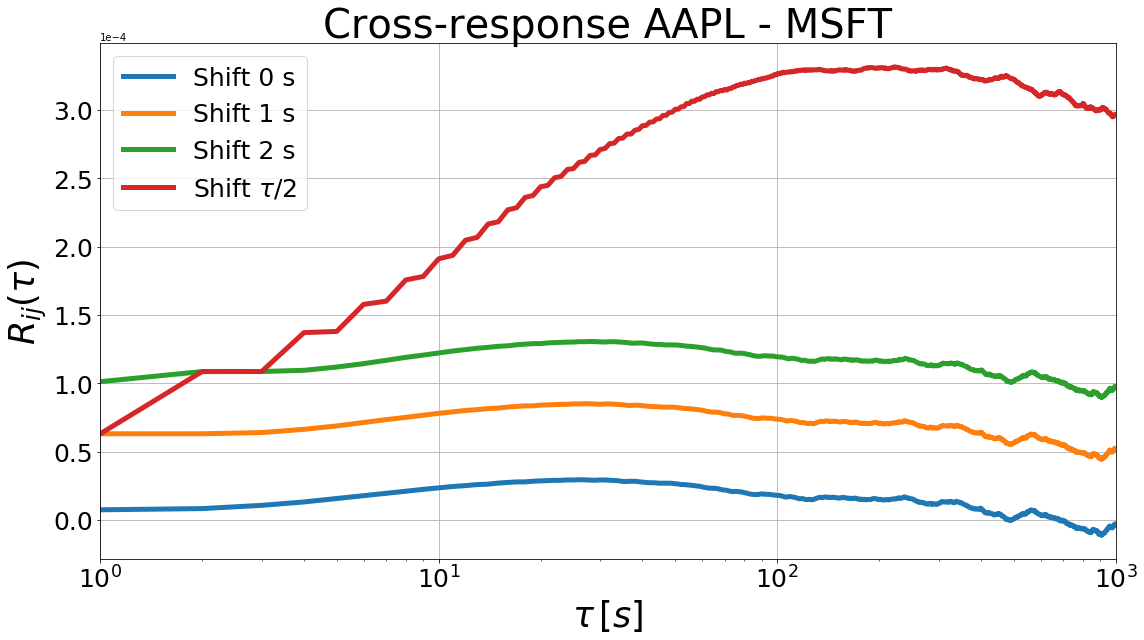

In [3]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
shifts = [0, 1, 2]

taq_cross_response_year_avg_responses_shift_plot(ticker_i, ticker_j, year, shifts)